# Imports

In [1]:
import pandas as pd
import numpy as np

c:\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Python39\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Data

In [ ]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


# Vizualization

In [8]:
import matplotlib.pyplot as plt
import missingno as msno

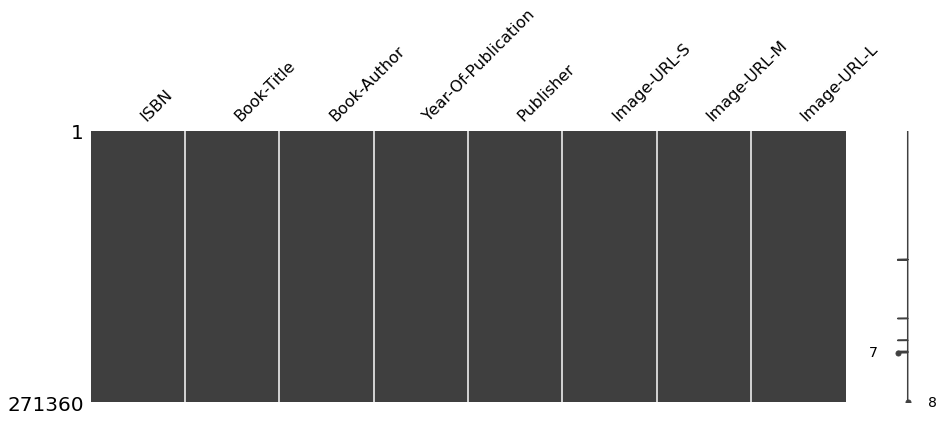

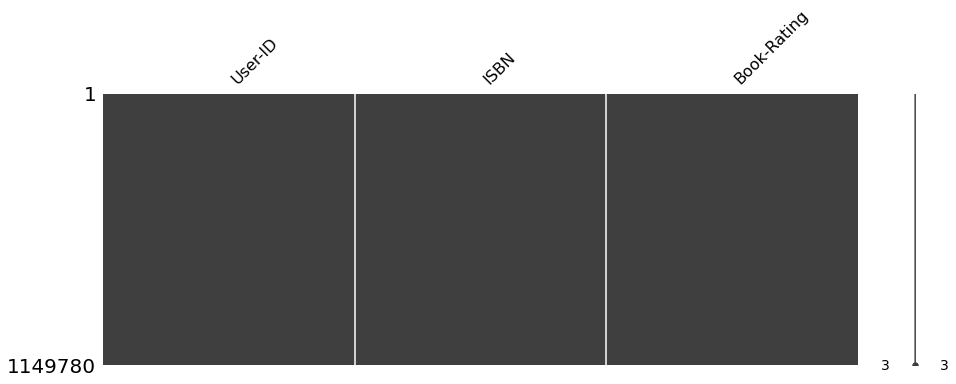

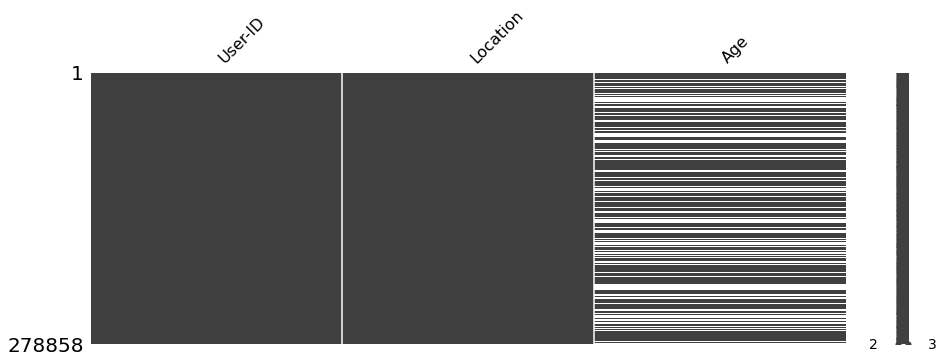

In [22]:
msno.matrix(books, figsize=(15,5));
msno.matrix(ratings, figsize=(15,5));
msno.matrix(users, figsize=(15,5));

# Prepare Data

In [57]:
new_books = books[['ISBN', 'Book-Title']].copy()
new_books

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...
4,0393045218,The Mummies of Urumchi
...,...,...
271355,0440400988,There's a Bat in Bunk Five
271356,0525447644,From One to One Hundred
271357,006008667X,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics)


### Get only users who have more than 200 reviews

In [24]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [97]:
x = (ratings['User-ID'].value_counts() > 200)
y = x[x].index

new_ratings = ratings.loc[ratings['User-ID'].isin(y)].copy()
new_ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


### Merge books with ratings

In [98]:
books_ratings = new_books.merge(new_ratings, on='ISBN')
books_ratings.rename(columns={'Book-Title': 'title', 'User-ID': 'user', 'Book-Rating': 'rating'}, inplace=True)
books_ratings

,ISBN,title,user,rating
0,0002005018,Clara Callan,11676,8
1,0002005018,Clara Callan,85526,0
2,0002005018,Clara Callan,96054,0
3,0002005018,Clara Callan,177458,0
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10
...,...,...,...,...
487666,0231128444,Slow Food(The Case For Taste),275970,0
487667,0520242335,Strong Democracy : Participatory Politics for ...,275970,0
487668,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",275970,0
487669,1582380805,Tropical Rainforests: 230 Species in Full Colo...,275970,0


In [99]:
books_ratings.shape

(487671, 4)

### Get books with more than 30 reviews

In [100]:
ratings_num = books_ratings.groupby('title')['rating'].count().reset_index()
ratings_num.rename(columns={'rating': 'ratings_num'}, inplace=True)
ratings_num

,title,ratings_num
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160264,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160265,Ã?Â?lpiraten.,1
160266,Ã?Â?rger mit Produkt X. Roman.,1
160267,Ã?Â?stlich der Berge.,1


In [101]:
books_ratings_ratings_num = books_ratings.merge(ratings_num, on='title')
books_ratings_ratings_num

,ISBN,title,user,rating,ratings_num
0,0002005018,Clara Callan,11676,8,4
1,0002005018,Clara Callan,85526,0,4
2,0002005018,Clara Callan,96054,0,4
3,0002005018,Clara Callan,177458,0,4
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,110912,10,3
...,...,...,...,...,...
487666,0231128444,Slow Food(The Case For Taste),275970,0,1
487667,0520242335,Strong Democracy : Participatory Politics for ...,275970,0,1
487668,0762412119,"Burpee Gardening Cyclopedia: A Concise, Up to ...",275970,0,1
487669,1582380805,Tropical Rainforests: 230 Species in Full Colo...,275970,0,1


In [102]:
dataset = books_ratings_ratings_num.loc[books_ratings_ratings_num['ratings_num'] > 30].copy()
dataset.drop_duplicates(['user','title'], inplace=True)
dataset

,ISBN,title,user,rating,ratings_num
7,0399135782,The Kitchen God's Wife,11676,9,111
8,0399135782,The Kitchen God's Wife,36836,0,111
9,0399135782,The Kitchen God's Wife,46398,9,111
10,0399135782,The Kitchen God's Wife,113270,0,111
11,0399135782,The Kitchen God's Wife,113519,0,111
...,...,...,...,...,...
323400,0553295349,Lucky's Lady,148744,0,35
323402,0553295349,Lucky's Lady,185233,0,35
323403,0553295349,Lucky's Lady,226545,0,35
323404,0553295349,Lucky's Lady,228764,0,35


# Pivot Table

In [103]:
dataset_pivot = dataset.pivot_table(columns='user', index='title', values='rating')
dataset_pivot.shape

(1652, 893)

In [104]:
dataset_pivot

user,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [111]:
dataset_pivot.fillna(0, inplace=True)
dataset_pivot

user,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Sparce Matrix

In [124]:
from scipy.sparse import csr_matrix
final_dataset = csr_matrix(dataset_pivot)

# Model

In [117]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(algorithm='brute', metric='euclidean')
model.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [118]:
model.fit(final_dataset)

NearestNeighbors(algorithm='brute', metric='euclidean')

# Predict

In [147]:
def print_result(suggestions):
  for target in suggestions[0]:
    print(dataset_pivot.index[target])


In [148]:
_, suggestions = model.kneighbors(dataset_pivot.loc['1984'].values.reshape(1,-1))
print_result(suggestions)

1984
No Safe Place
Night Moves (Tom Clancy's Net Force, No. 3)
The Apocalypse Watch
The Experiment


In [154]:
_, suggestions = model.kneighbors(dataset_pivot.loc['Hannibal'].values.reshape(1,-1))
print_result(suggestions)

Hannibal
Windmills of the Gods
The Juror
Ssn
Vittorio the Vampire: New Tales of the Vampires


In [155]:
_, suggestions = model.kneighbors(dataset_pivot.loc['Harry Potter and the Prisoner of Azkaban (Book 3)'].values.reshape(1,-1))
print_result(suggestions)

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


In [156]:
_, suggestions = model.kneighbors(dataset_pivot.loc['Jurassic Park'].values.reshape(1,-1))
print_result(suggestions)

Jurassic Park
The Bookman's Wake (Cliff Janeway Novels (Paperback))
The Terminal Man
The Great Train Robbery
Looking Back


In [169]:
_, suggestions = model.kneighbors(dataset_pivot.loc['The Little Prince'].values.reshape(1,-1))
print_result(suggestions)

The Little Prince
The Passion
The Apocalypse Watch
Night Moves (Tom Clancy's Net Force, No. 3)
Long After Midnight


In [170]:
_, suggestions = model.kneighbors(dataset_pivot.loc['The Da Vinci Code'].values.reshape(1,-1))
print_result(suggestions)

The Da Vinci Code
TickTock
Touching Evil
Blow Fly: A Scarpetta Novel
Hurricane Bay
